In [55]:
# project: p1
# submitter: osundairo
# partner: none
# hours: 40
import os
import pandas as pd
import copy
import json
import matplotlib.pyplot as plt
from subprocess import check_output,CalledProcessError, PIPE
from time import time
import numpy as np

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x<5 or x>10 # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix_match = "esque" in word.lower() # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [5]:
def add(a=1,b=1):  
    return a+b

In [6]:
#q4
add(3, 4)

7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]

In [10]:
def smart_count(num):
    total=0
    for x in num:
        if x <0:
            break
        elif x>10:
            pass
        else:
            total+=x
    return total
            
        

In [11]:
#q7
smart_count(nums)

14

In [12]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [13]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [14]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#q10
rows[0][-1]["x"]

8

In [16]:
#q11
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [17]:
#q12
num=header.index("B")
total=0
for x in range(len(rows)):
    total+=rows[x][num]
total
    

10007

In [18]:
#q13
sorted(rows, key=lambda rows: rows[num]) 

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [19]:
f = open("usd.json")
data = json.load(f)
listt= list()
rate=data["eur"]["rate"]
conversion = rate*400
f.close()

In [20]:
#q14
conversion

351.68980166476797

In [21]:
def  divide(x,y):
    try:
        return(x/y)
    except ZeroDivisionError:
        return (float("nan"))

In [22]:
#q15
divide(3, 2)

1.5

In [23]:
#q16
divide(-3, 0)

nan

In [24]:
years={} 
path = "home-computers"
path2 = "home-computers/"
dir_list = os.listdir(path)

for x in dir_list:
    l=pd.read_csv(path2+x,skiprows = 1).set_index("Geographic Area Name")
    years[int(x[7:11])]=l
years_sorted=list(sorted(years.keys()))

In [25]:
#q17
years_sorted

[2013, 2014, 2015, 2016, 2017, 2018]

In [26]:
#q18
df = years[2018]
df.at[ "Wisconsin" ,  "Estimate!!Total" ]


2371960

In [27]:
#q19
totalnocomp= df[ "Estimate!!Total!!No Computer" ].sum()
totalnocomp

10285814

In [28]:
#q20
(df["Margin of Error!!Total!!No Computer" ]/df[ "Estimate!!Total!!No Computer" ]).max()

0.12375641594322287

In [29]:
#q21
df.at[ "Wisconsin" ,  "Estimate!!Total!!No Computer" ]
df.loc["Illinois", "Estimate!!Total!!No Computer"]
state_dict={}
midstates=[ "Illinois", "Indiana","Iowa","Michigan","Minnesota", "Wisconsin"]
for i in midstates:
    res=df.loc[i, "Estimate!!Total!!No Computer"]/df.loc[i, "Estimate!!Total"]*100
    state_dict[i]=res
    
state_dict  

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

Text(0, 0.5, '% of Households w/o Computers')

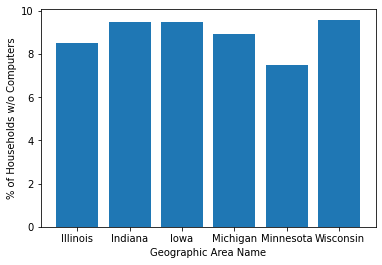

In [30]:
#q22
keys = state_dict.keys()
values = state_dict.values()

plt.bar(keys, values)
plt.xlabel('Geographic Area Name')
plt.ylabel('% of Households w/o Computers')
 

(0.0, 394.4341)

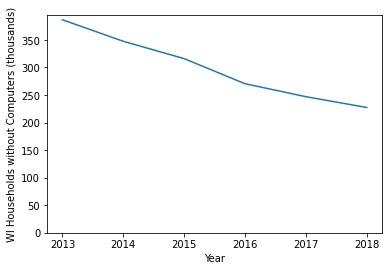

In [31]:
#q23 
wi_years={}
for i in years_sorted:
    per_thous=years[i].at[ "Wisconsin" ,  "Estimate!!Total!!No Computer" ]/1000
    wi_years[i]= per_thous
wi_years 
keys = wi_years.keys()
values = wi_years.values()

plt.plot(keys, values)
plt.xlabel('Year')
plt.ylabel('WI Households without Computers (thousands)')

plt.ylim(0)

Text(0, 0.5, 'Tablet (millions)')

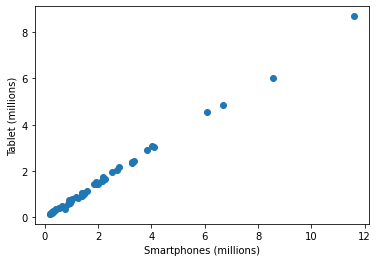

In [32]:
#q24

tablets=df[ "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]/1000000
phones=df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]/1000000
plt.scatter(phones, tablets)
plt.xlabel('Smartphones (millions)')
plt.ylabel('Tablet (millions)')

In [33]:
#q25

output =str(check_output(["git", "log"], cwd="flask"), encoding="utf-8").split("\n")
output[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [34]:
#q26
lissst=[]
for i in output:
    if "commit" in i :
        if i.split(" ")[1]== "":
            continue
        else:
            lissst.append(i.split(" ")[1])
        
lissst[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [35]:
#q27

#check_output(["git", "checkout", "main"])
#check_output(["git", "checkout", lissst[2], "README.rst"], cwd="flask",encoding="utf-8")
                 
#file1 = open("flask/README.rst", "rb")

#gg=file1.read()
#gg

In [36]:
#q28


In [42]:
#q29
try:
    check_output(["pip3", "instal"], stderr=PIPE)
except CalledProcessError as e:
    output=e.stderr
output

b'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [56]:
#q30
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

t0 = time()
for row in df.iterrows():
    pass
t1 = time()
t00 = time()
for row in df.itertuples():
    pass
t11 = time()

In [57]:
#q31
rand_df(50)

,A,B,C,D
r1,0,1,0,8
r2,2,2,2,3
r3,3,9,7,5
r4,1,9,9,6
r5,4,8,3,6
r6,4,6,5,0
r7,1,8,6,8
r8,6,8,7,0
r9,9,1,5,8
r10,6,9,6,5


In [40]:
#q32


plt.plot(keys, values)
plt.xlabel('Year')
plt.ylabel('WI Households without Computers (thousands)')